[Página inicio](index.html#indice)

## 3. Factores de competitividad turística CyL

En este __tercer apartado__ nos vamos a centrar en diferentes __factores que afectan a la competitividad turística de CyL__

Para identificar factores de competitividad clave nos vamos a basar en el __framework que propone el World Economic Forum__: [Travel & Tourism Development Index Framework](https://www.weforum.org/reports/travel-and-tourism-development-index-2021/in-full/about-the-travel-tourism-development-index/) en este framework hay 6 pilares y un amplio conjunto de indicadores.
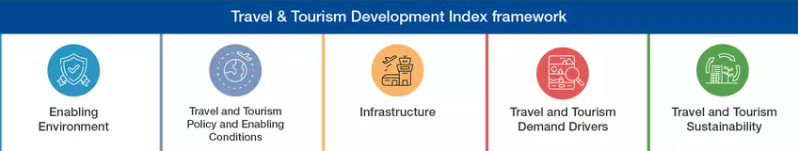

Nos vamos a centrar sólo en algunos factores de competitividad de este framework que creemos que son de aplicación para CyL. Lo relativo a infraestructuras turísticas, aspecto clave de la competitividad, ya ha sido analizado anteriomente, de modo que nos vamos a centrar en los siguientes factores:

* __Gobernanza y gestión estratégica__
* __Patrimonio cultural y artístico__
* __Seguridad ciudadana__
* __Sostenibilidad__

Esta selección __no pretende ser exhaustiva__, sino una selección de alguno de los factores de competitividad que consideramos clave en CyL y que podemos obtener en fuentes abiertas.

In [130]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

## 3.1 Gobernanza y gestión estratégica

Tratamos de medir __el peso que tiene el turismo en la gestión los organismos públicos de CyL__, en qué medida hay un __liderazgo y una gobernanza__ en los organismos públicos para desarrollar el turismo y en qué medida es un aspecto  estratégico.

Para medir estos aspectos vamos a tomar entre las posibles métricas, el personal de las administraciones dedicado a el turismo, para ello vamos a usar la siguiente fuente de datos del portal de datos abiertos de la Junta de CyL: [Relación de puestos de trabajo de personal funcionario en admin. general y organismos autónomos](https://datosabiertos.jcyl.es/web/jcyl/set/es/sector-publico/rpt-personal-funcionario/1284893930508)

Esta es una muestra de los datos del fichero:

In [131]:
# lectura fichero
dfp = pd.read_csv("input\\relacion-de-puestos-de-trabajo-de-personal-funcionario-en-administracion-general.csv",  
                sep=';', header='infer')
dfp.head(10)

,Consejería,Unidad Administrativa 1,Unidad Administrativa 2,Unidad Administrativa 3,Unidad Administrativa 4,Descr. Organo de Dependencia,Puesto,Nombre del Puesto,Puesto Tipo,Cuerpo Puesto,...,Forma de Ocupación,Estado del Puesto,Provincia,Municipio,Localidad,Funciones,Grado Estudios Puesto,Titulación Puesto,Especialidad Puesto,Experiencia Profesional
0,CONSEJERIA DE LA PRESIDENCIA,GABINETE DEL PRESIDENTE,NaN,NaN,NaN,GABINETE DEL PRESIDENTE,10007,Secretario/a de Alto Cargo P,NaN,NaN,...,OD,R,VALLADOLID,VALLADOLID,VALLADOLID,P51000 Secretaría Jefe Gabinete,NaN,NaN,NaN,NaN
1,CONSEJERIA DE LA PRESIDENCIA,GABINETE DEL PRESIDENTE,NaN,NaN,NaN,GABINETE DEL PRESIDENTE,10008,Secretario/a de Alto Cargo,NaN,NaN,...,OP,R,VALLADOLID,VALLADOLID,VALLADOLID,W55000 Apoyo Secretaria Presidente Junta,NaN,NaN,NaN,NaN
2,CONSEJERIA DE LA PRESIDENCIA,GABINETE DEL PRESIDENTE,SERVICIO DE ORGANIZACION Y SECRETRIA,NaN,NaN,SERVICIO DE ORGANIZACION Y SECRETRIA,10019,Técnico de Gestión,NaN,NaN,...,OD,R,VALLADOLID,VALLADOLID,VALLADOLID,TOS000 Tramit. exped. Org. y Secretaria,NaN,NaN,NaN,NaN
3,CONSEJERIA DE LA PRESIDENCIA,GABINETE DEL PRESIDENTE,SERVICIO DE ORGANIZACION Y SECRETRIA,NaN,NaN,SERVICIO DE ORGANIZACION Y SECRETRIA,65209,Secretario/a de Alto Cargo,NaN,"CG001, CGX01, DG001, DGX01",...,OD,R,VALLADOLID,VALLADOLID,VALLADOLID,W56000 Apoyo Secretaria Gabinete AMO000 ...,NaN,NaN,NaN,NaN
4,CONSEJERIA DE LA PRESIDENCIA,VICECONSEJERIA DE RELACIONES INSTITUCIONALES Y...,DIRECCION GENERAL DE RELACIONES INSTITUCIONALES,"SERVICIO DE ORDENACIÓN, GESTIÓN Y AUTORIZACION...",NaN,"SERVICIO DE ORDENACIÓN, GESTIÓN Y AUTORIZACION...",10494,Jefe de Sección,NaN,"AG001, AGX01",...,OT,R,VALLADOLID,VALLADOLID,VALLADOLID,GIJ000 Gest. impul.activ.NORMAT. y sancion,04-Licenciado/Ing./Arquit/Tit Superior,3024-Licenciado o Grado en Derecho,-,NaN
5,CONSEJERIA DE LA PRESIDENCIA,VICECONSEJERIA DE RELACIONES INSTITUCIONALES Y...,DIRECCION GENERAL DE RELACIONES INSTITUCIONALES,"SERVICIO DE ORDENACIÓN, GESTIÓN Y AUTORIZACION...",NaN,"SERVICIO DE ORDENACIÓN, GESTIÓN Y AUTORIZACION...",40555,Jefe de Negociado,NaN,CG001,...,OD,R,VALLADOLID,VALLADOLID,VALLADOLID,303299 Tramit. exped. AUTORIZAC. Y PROCEDI,NaN,NaN,NaN,NaN
6,CONSEJERIA DE LA PRESIDENCIA,VICECONSEJERIA DE RELACIONES INSTITUCIONALES Y...,DIRECCION GENERAL DE RELACIONES INSTITUCIONALES,SERVICIO DE COLABORACION Y COOPERACION,NaN,SERVICIO DE COLABORACION Y COOPERACION,56112,Jefe de Servicio,NaN,NaN,...,OD,R,VALLADOLID,VALLADOLID,VALLADOLID,301996 Org. y dirig. act. Colab. Y Coop. A,NaN,NaN,NaN,NaN
7,CONSEJERIA DE LA PRESIDENCIA,VICECONSEJERIA DE RELACIONES INSTITUCIONALES Y...,DIRECCION GENERAL DE RELACIONES INSTITUCIONALES,SERVICIO DE RELACIONES CON LAS CORTES,NaN,SERVICIO DE RELACIONES CON LAS CORTES,10043,Auxiliar,NaN,DG001,...,NaN,R,VALLADOLID,VALLADOLID,VALLADOLID,"AMO000 Archivo, Mecanografia y Ofimatica",NaN,NaN,NaN,NaN
8,CONSEJERIA DE LA PRESIDENCIA,VICECONSEJERIA DE RELACIONES INSTITUCIONALES Y...,DIRECCION GENERAL DE RELACIONES INSTITUCIONALES,SERVICIO DE RELACIONES CON LAS CORTES,NaN,SERVICIO DE RELACIONES CON LAS CORTES,10047,Jefe de Sección,NaN,AG001,...,OD,R,VALLADOLID,VALLADOLID,VALLADOLID,302987 Gest. impul.activ.de ESTUDIOS Y REG,04-Licenciado/Ing./Arquit/Tit Superior,3024-Licenciado o Grado en Derecho,-,NaN
9,CONSEJERIA DE LA PRESIDENCIA,VICECONSEJERIA DE RELACIONES INSTITUCIONALES Y...,DIRECCION GENERAL DE RELACIONES INSTITUCIONALES,SERVICIO DE FUNDACIONES Y ASOCIACIONES,NaN,SERVICIO DE FUNDACIONES Y ASOCIACIONES,17996,Auxiliar,NaN,DG001,...,NaN,R,VALLADOLID,VALLADOLID,VALLADOLID,"AMO000 Archivo, Mecanografia y Ofimatica",NaN,NaN,NaN,NaN


Filtramos los puestos correspondientes a: 'CONSEJERIA DE CULTURA Y TURISMO' y agrupamos por provincia

In [104]:
# filtrado
dfp1 = dfp[dfp['Consejería']=='CONSEJERIA DE CULTURA Y TURISMO']

In [132]:
# agrupación y ordenación
dfp2 = dfp1.groupby(['Provincia']).agg({
    'Puesto': 'count',
}).reset_index()
dfp2.sort_values(by='Puesto', ascending=False, inplace=True)

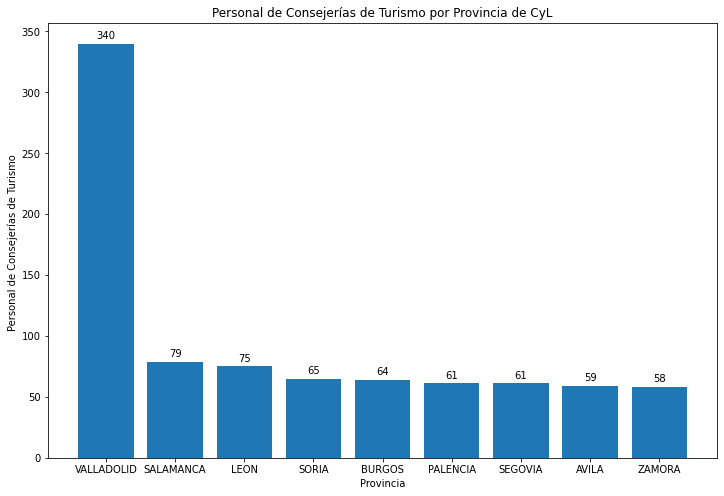

In [108]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(dfp2['Provincia'], dfp2['Puesto'])

# Agregar etiquetas y título
ax.set_xlabel('Provincia')
ax.set_ylabel('Personal de Consejerías de Turismo ')
ax.set_title('Personal de Consejerías de Turismo por Provincia de CyL')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

Vemos una clara diferencia entre Valladolid y el resto de comunidades, aunque esto también pueda ser motivado por la centralización de organismos de CyL en Valladolid (sede de la Junta, etc..). En segunda posición se sitúa Salamanca que sin ser una de las provincias con mayor población si cuenta con el segundo mayor número de personal de consejerías de turismo lo cual muestra su apuesta por el turismo desde la gestión pública.

Otra cuestión que nos parece intersante analizar es la apuesta de CyL hacia una estrategia de __[destinos turísticos inteligentes](https://www.destinosinteligentes.es/que-es-dti/)__.El __Destino Turístico Inteligente (DTI)__ se define como un destino turístico innovador, con una infraestructura tecnológica de vanguardia, que garantiza el desarrollo sostenible del territorio turístico, accesible para todos, facilitando la interacción e integración del visitante con el entorno e incrementando la calidad de su experiencia en el destino y la mejora de la calidad de vida del residente. Como fuente de datos vamos a revisar los publicados por [Segittur](https://www.segittur.es/) sobre  [la Red de destinos turísticos inteligentes](https://www.destinosinteligentes.es/wp-content/uploads/2022/11/Miembros-Red-DTI-20221122.pdf
)

Bajamos los datos correspondientes a CyL y a organismos públicos. Esta es una muestra de los datos del fichero:

In [110]:
# lectura fichero
dfdi = pd.read_csv("input\\DTI_CyL.csv",  
                sep=';', header='infer')
dfdi.head(20)

,miembro,tipo_institucion,provincia
0,Astorga,Ayuntamientos,León
1,Ávila,Ayuntamientos,Ávila
2,Barco de Ávila,Ayuntamientos,Ávila
3,Belorado,Ayuntamientos,Burgos
4,Cacabelos,Ayuntamientos,León
5,Burgos,Ayuntamientos,Burgos
6,Camponraya,Ayuntamientos,León
7,Candelario,Ayuntamientos,Salamanca
8,Cebreros,Ayuntamientos,Ávila
9,Consejo Comarcal de El Bierzo,Comarca,León


Analizamos los DTI que hay en cada provincia:

In [111]:
# agrupación y ordenación
dfdi2 = dfdi.groupby(['provincia']).agg({
    'miembro ': 'count',
}).reset_index()
dfdi2.sort_values(by='miembro ', ascending=False, inplace=True)

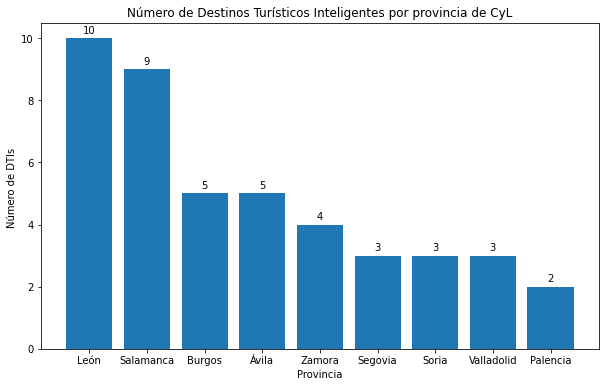

In [113]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(dfdi2['provincia'], dfdi2['miembro '])

# Agregar etiquetas y título
ax.set_xlabel('Provincia')
ax.set_ylabel('Número de DTIs ')
ax.set_title('Número de Destinos Turísticos Inteligentes por provincia de CyL')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

Vemos que __León y Salamanca se diferencia claramente en su apuesta por DTIs__ en sus ayuntamientos, comarcas y diputaciones.

## 3.2 Patrimonio cultural y artístico

__El Patrimonio cultural y artístico__ es uno de los grandes atractivos turísticos de una región y factor clave en su competitividad turística  por ello lo vamos analizar. Entre las posibles métricas seleccionamos la relativa al número de monumentos de interés. Obtenemos esta información del portal de datos abiertos de la Junta de CyL: [Relación de monumentos CyL](https://datosabiertos.jcyl.es/web/jcyl/set/es/cultura-ocio/monumentos/1284325843131)

Esta es una muestra de los datos del fichero:

In [114]:
# lectura fichero
dfm = pd.read_csv("input\\relacion-monumentos.csv",  
                sep=';', header='infer')
dfm.sample(5)

,identificador,nombre,tipoMonumento,identificadorBienInteresCultural,calle,clasificacion,tipoConstruccion,codigoPostal,Descripcion,periodoHistorico,coordenadas_latitud,coordenadas_longitud,poblacion_provincia,poblacion_municipio,poblacion_localidad,pto_geolocalizado,poblacion,coordenadas
338,26149,Iglesia de Santa Águeda o de Santa Gadea,Iglesias y Ermitas,NaN,"Santa Águeda, 12",Arquitectura Religiosa,Iglesia,9003.0,"<p>Iglesia del siglo XV, de estilo gótico, sit...",Edad Moderna,42.339695,-3.706675,Burgos,Burgos,Burgos,"42.339695,-3.706675","{""provincia"": ""Burgos"", ""municipio"": ""Burgos"",...","{""latitud"": ""42.339695"", ""longitud"": ""-3.706675""}"
410,26048,Ruinas del Santuario Nuestra Señora del Valle,Santuarios,17092,NaN,Arquitectura Religiosa,Santuario,49782.0,<p>La vinculaci&oacute;n de nuestro santuario ...,Edad Moderna,42.069735,-5.716730,Zamora,Villabrázaro,San Román del Valle,"42.069735,-5.71673","{""provincia"": ""Zamora"", ""municipio"": ""Villabrá...","{""latitud"": ""42.069735"", ""longitud"": ""-5.71673#""}"
950,25396,Plaza de toros de Toro,Otros edificios,17060,Plaza de S. Francisco s/n,Arquitectura Popular,NaN,49800.0,<p>Constituye uno de los conjuntos conservados...,Edad Contemporánea,41.522635,-5.388502,Zamora,Toro,Toro,"41.522635,-5.388502","{""provincia"": ""Zamora"", ""municipio"": ""Toro"", ""...","{""latitud"": ""41.522635"", ""longitud"": ""-5.388502""}"
2,23944,Abrigo de las Cabras,Yacimientos arqueológicos,1067,1''5 Kms de Ojos Albos dirección SE,Yacimiento,Arte rupestre,5193.0,"<p align=""justify"">Se trata de dos paneles con...",NaN,40.705514,-4.516540,Ávila,Ojos-Albos,Ojos-Albos,"40.7055145,-4.5165401","{""provincia"": ""Ávila"", ""municipio"": ""Ojos-Albo...","{""latitud"": ""40.7055145"", ""longitud"": ""-4.5165..."
769,26100,Iglesia parroquial de San Pedro Manrique,Iglesias y Ermitas,NaN,"Las Campanas, s/n",Arquitectura Religiosa,Iglesia,42174.0,"<p>Del siglo XVII, dedicada a San Martín. Con ...",Edad Moderna;Edad Media,42.029756,-2.230554,Soria,San Pedro Manrique,San Pedro Manrique,"42.029756,-2.230554","{""provincia"": ""Soria"", ""municipio"": ""San Pedro...","{""latitud"": ""42.029756"", ""longitud"": ""-2.230554""}"


Analizamos el número de monumentos por provincia

In [116]:
# agrupación y ordenación
dfm1 = dfm.groupby(['poblacion_provincia']).agg({
    'nombre': 'count',
}).reset_index()
dfm1.rename(columns={'nombre': 'monumentos'}, inplace=True)
dfm1.sort_values(by='monumentos', ascending=False, inplace=True)

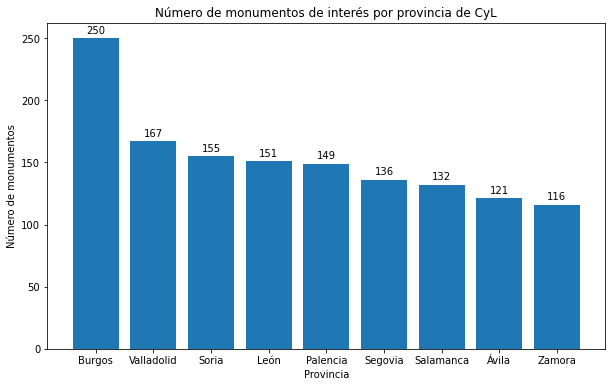

In [117]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(dfm1['poblacion_provincia'], dfm1['monumentos'])

# Agregar etiquetas y título
ax.set_xlabel('Provincia')
ax.set_ylabel('Número de monumentos')
ax.set_title('Número de monumentos de interés por provincia de CyL')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

Observamos que con diferencia __Burgos es la provincia que más monumentos dispone de su patrimonio__, seguida a distancia por Valladolid y Soria. A continuación obtenemos una variante de este gráfico añadiendo la clasificación del monumento.

In [118]:
# agrupación y ordenación
dfm2 = dfm.groupby(['poblacion_provincia', 'clasificacion']).agg({
    'nombre': 'count',
}).reset_index()
dfm2.rename(columns={'nombre': 'monumentos'}, inplace=True)
dfm2.sort_values(by=['monumentos', 'clasificacion'], ascending=False, inplace=True)

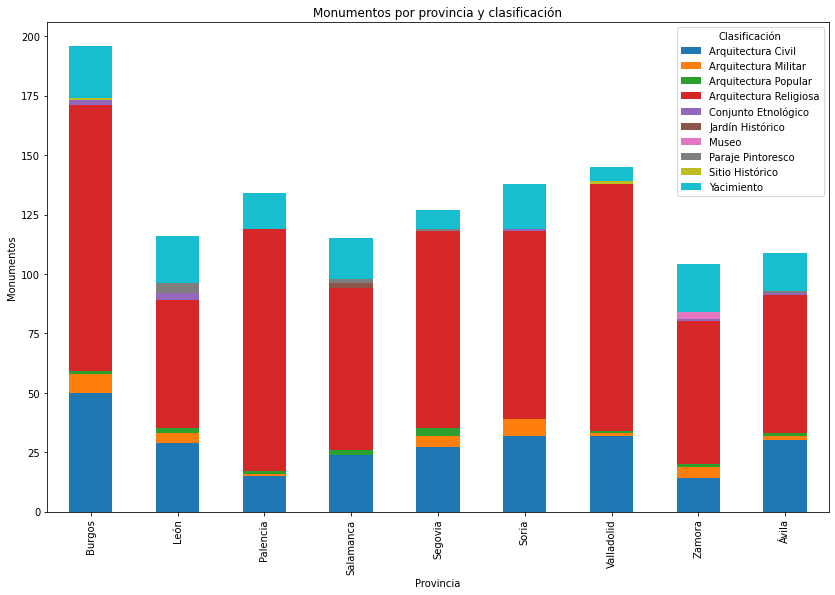

In [119]:
df_pivot = dfm2.pivot(index='poblacion_provincia', columns='clasificacion', values='monumentos')

# Crear el gráfico de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 9))

# Añadir etiquetas y título
ax.set_xlabel('Provincia')
ax.set_ylabel('Monumentos')
ax.set_title('Monumentos por provincia y clasificación')

# Añadir leyenda
ax.legend(title='Clasificación')

# Mostrar el gráfico
plt.show()

Lo vemos también en formato tabla cruzada

In [120]:
# tabla cruzada
tab = pd.crosstab(index=dfm2['poblacion_provincia'], columns=dfm2['clasificacion'], values=dfm2['monumentos'], aggfunc='sum')
tab=tab.fillna(0)
tab

clasificacion,Arquitectura Civil,Arquitectura Militar,Arquitectura Popular,Arquitectura Religiosa,Conjunto Etnológico,Jardín Histórico,Museo,Paraje Pintoresco,Sitio Histórico,Yacimiento
poblacion_provincia,,,,,,,,,,
Burgos,50.0,8.0,1.0,112.0,2.0,0.0,0.0,0.0,1.0,22.0
León,29.0,4.0,2.0,54.0,3.0,0.0,0.0,4.0,0.0,20.0
Palencia,15.0,1.0,1.0,102.0,0.0,0.0,0.0,0.0,0.0,15.0
Salamanca,24.0,0.0,2.0,68.0,0.0,2.0,0.0,2.0,0.0,17.0
Segovia,27.0,5.0,3.0,83.0,0.0,0.0,0.0,1.0,0.0,8.0
Soria,32.0,7.0,0.0,79.0,1.0,0.0,0.0,0.0,0.0,19.0
Valladolid,32.0,1.0,1.0,104.0,0.0,0.0,0.0,0.0,1.0,6.0
Zamora,14.0,5.0,1.0,60.0,1.0,0.0,3.0,0.0,0.0,20.0
Ávila,30.0,2.0,1.0,58.0,1.0,0.0,0.0,1.0,0.0,16.0


## 3.3 Seguridad ciudadana

La __seguridad ciudadana es otro aspecto clave en la competitividad turística__ de un destino. La métrica que vamos a revisar es el número
de delitos que podemos encontrar en el INE: [Delitos por provincia](https://www.ine.es/jaxiT3/Datos.htm?t=49054). Estos datos son del año 2021, pero nos valen como referencia.

In [121]:
# lectura fichero
dfd = pd.read_excel("input//seguridad_ciudadana_provincias_2021.xls")
dfd

,provincias,delitos
0,Ávila,888
1,Burgos,2943
2,León,3390
3,Palencia,1173
4,Salamanca,2271
5,Segovia,1026
6,Soria,653
7,Valladolid,4110
8,Zamora,1162


Añadimos los datos de población, para contextualizar el dato de delitos y obtener un ratio (delitos por mil habitantes)

In [122]:
#Población: Ávila, Burgos,Leon,Palencia,Salamanca,Segovia,Soria,Valladolid,Zamora
dfd['poblacion'] = [158140, 355045, 448179, 158008, 325898, 153803, 88377, 517975, 167215  ]

In [123]:
# clculo campo ratio y ordenación
dfd = dfd.assign(ratio_delitos = ((dfd['delitos']/dfd['poblacion'])*1000).round(2))
dfd.sort_values(by='ratio_delitos', ascending = False, inplace=True)
dfd

,provincias,delitos,poblacion,ratio_delitos
1,Burgos,2943,355045,8.29
7,Valladolid,4110,517975,7.93
2,León,3390,448179,7.56
3,Palencia,1173,158008,7.42
6,Soria,653,88377,7.39
4,Salamanca,2271,325898,6.97
8,Zamora,1162,167215,6.95
5,Segovia,1026,153803,6.67
0,Ávila,888,158140,5.62


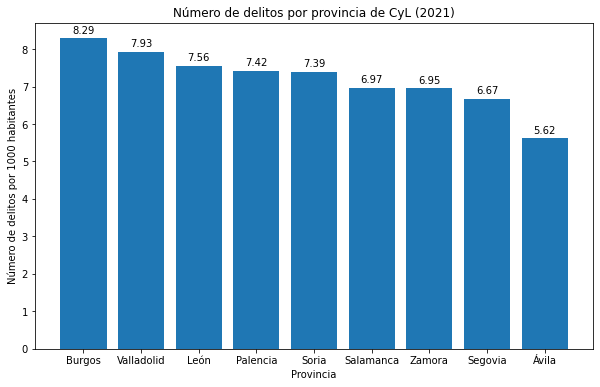

In [124]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(dfd['provincias'], dfd['ratio_delitos'])

# Agregar etiquetas y título
ax.set_xlabel('Provincia')
ax.set_ylabel('Número de delitos por 1000 habitantes')
ax.set_title('Número de delitos por provincia de CyL (2021)')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

Tal y como se observa __la ciudad con menos delitos es Ávila__ con distancia sobre los siguientes que son Segovia y Zamora. Las ciudades con __peor ratio son Burgos y Valladolid__.

## 3.4 Sostenibilidad

La __sostenibilidad es otro aspecto clave en la competitividad turística__ de un destino. 

Para analizar este aspecto vamos a utilizar una fuente de datos del portal de datos abiertos de la Junta de CyL: [Indicadores ambientales y de sostenibilidad](https://datosabiertos.jcyl.es/web/jcyl/set/es/medio-ambiente/indicadoresambientales/1284227444931)

Esta es una muestra de los datos del fichero:

In [139]:
# lectura fichero
dfs = pd.read_csv("input\\Indicadores_medioambientales.csv",  
                sep=';', header='infer')
dfs.sample(10)

,Indicador,Provincia,Fecha validez,Valor,Unidad,Frecuencia,
4309,Recogida selectiva de papel,Valladolid,2010,15.376.265,Kilogramos por habitante y año,12 meses,NaN
3001,Número de turistas de turismo rural en Castill...,Segovia,2016,128.363,Individuos,12 meses,NaN
267,Calidad del aire en el medio urbano. Contamina...,Salamanca,2016,20,Microgramos entre m3,12 meses,NaN
960,Consumo de energía del sector industrial,Palencia,2012,751.543,Kw/h,12 meses,NaN
4754,Renta per capita,León,2004,16.581,Euros por habitante,12 meses,NaN
727,Consumo de energía del sector del transporte,Palencia,2003,255.144,Tm,12 meses,NaN
2334,Evolución demográfica,Salamanca,2010,353.619,Nº Habitantes,12 meses,NaN
5494,Tasa de actividad,Salamanca,2016,54,Porcentaje,12 meses,NaN
4819,Renta per capita,Salamanca,2011,19.164,Euros por habitante,12 meses,NaN
2985,Número de turistas de turismo rural en Castill...,Valladolid,2014,47.300,Individuos,12 meses,NaN


Encontramos muchos indicadores interesantes en este conjunto de datos. Nos vamos a centrar en los indicadores relativos a: 
agricultura ecológica, calidad del aire, consumo de energía, espacios naturales y superficie forestal y en datos posteriores a 2012.

In [136]:
# listado de indicadores a filtrar
total_indicadores = ['Agricultura ecológica', 'Calidad del aire en el medio urbano. Contaminación por NO2',
'Calidad del aire en el medio urbano. Contaminación por ozono. Nº de superaciones de ozono.',
'Calidad del aire en el medio urbano. Contaminación por partículas. Concentración PM10',
'Calidad del aire en el medio urbano. Contaminación por partículas. Nº de superaciones PM10',
'Consumo de energía del sector del transporte',
'Consumo de energía del sector industrial',
'Consumo de energía final', 
 'Espacios Naturales Protegidos','Nº de Incendios forestales',
'Número de visitantes en los Espacios Naturales Protegidos',
 'Superficie Forestal Total', 'Superficie Forestal con Plan de Ordenación',
 'Superficie de Espacios Naturales Protegidos']

In [137]:
dfs2 = dfs1[(dfs1['Indicador'].isin(total_indicadores) ) & (dfs1['Fecha validez'] > 2012)]

Acudimos a ChatGPT para que nos haga un análisis en base a estos datos.

In [ ]:
# importar libreria
import openai
# Establecer la clave de la API de OpenAI
openai.api_key = ''

In [134]:
# función para llamada a chatgpt
def preguntar_a_chatgpt(pregunta):
    response = openai.Completion.create(
        engine='text-davinci-003',  # Selecciona el motor de ChatGPT
        prompt=pregunta,
        max_tokens=50,  # Define el límite de tokens para la respuesta
        n=1,  # Solicita una única respuesta
        stop=None,  # Define las condiciones de parada, si es necesario
        temperature=0.7,  # Ajusta la temperatura para el nivel de creatividad en las respuestas
    )
    return response.choices[0].text.strip()

En primer lugar le enviamos los datos descargados y la estructura del mismo y después realizamos la pregunta

In [ ]:
texto_chatgpt = """
Te adjunto unos datos sobre indicadores medioambientales de Castilla y León (España). DATOS: 
""" + dfs2.to_string() + """
 Los campos del fichero son los siguientes:
Indicador: indicador medioambiental sobre el que se reportan los datos
Provincia: provincia de Castilla y León a la que pertenecen los datos
Fecha validez: Año de loa datos
Valor: valor que toma el indicador
Unidad: unidades en las que está medido ese valor
Frecuencia: frecuencia de los datos 
"""

Generamos las preguntas a realizar a ChatGPT.   
__pregunta9__:
    Quiero que actúes como un analista de datos y me hagas un informe basado en los datos del fichero. 
El objetivo es detectar insights relevantes, revisar tendencia temporal, comparativa entre las distintas provincias 
y si se puede sacar alguna conclusión relevante.

In [129]:
pregunta9 = """
Quiero que actúes como un analista de datos y me hagas un informe basado en los datos del fichero. 
El objetivo es detectar insights relevantes, revisar tendencia temporal, comparativa entre las distintas provincias 
y si se puede sacar alguna conclusión relevante.
"""

In [ ]:
res_chatgpt9 = preguntar_a_chatgpt(pregunta9)

In [64]:
print(res_chatgpt9)


Por supuesto, estaré encantado de ayudarte a analizar los datos y crear un informe basado en ellos. Dado que los datos son extensos, comenzaré con un análisis general y luego profundizaré en algunos aspectos específicos que podrían proporcionar insights interesantes. Aquí está el informe:

Informe de Análisis de Datos Medioambientales - Castilla y León

Resumen:
El conjunto de datos proporciona información sobre diversos indicadores medioambientales en las provincias de Castilla y León. Estos indicadores abarcan una amplia gama de aspectos, desde la superficie forestal y los espacios naturales protegidos hasta los incendios forestales y la afluencia de visitantes en estas áreas. El análisis se centra en explorar tendencias temporales, comparativas entre provincias y patrones relevantes.

Análisis Temporal:

Tendencias de Incendios Forestales: A lo largo de los años, se observa una variabilidad en el número de incendios forestales. Si bien en algunos años ha habido un aumento en el núm

Generamos las preguntas a realizar a ChatGPT.
__pregunta10__: ¿Cómo pueden afectar al turismo estos datos medioambientales de Castilla y León?

In [65]:
pregunta10="¿Cómo pueden afectar al turismo estos datos medioambientales de Castilla y León?"

In [ ]:
res_chatgpt10 = preguntar_a_chatgpt(pregunta10)

In [67]:
print(res_chatgpt10)


Los datos medioambientales de Castilla y León pueden tener un impacto significativo en la industria del turismo en la región. El turismo en áreas naturales y rurales está estrechamente relacionado con la calidad del entorno natural y las prácticas de conservación. Aquí hay algunas formas en las que estos datos pueden afectar al turismo:

1. Atractivo Turístico:
Los datos sobre la superficie de espacios naturales protegidos y la biodiversidad pueden influir en el atractivo turístico de la región. Las áreas ricas en biodiversidad y paisajes naturales atractivos son más propensas a atraer a los turistas interesados en la naturaleza, el ecoturismo y el senderismo.

2. Ecoturismo y Turismo Sostenible:
La información sobre el número de visitantes en espacios naturales protegidos y la frecuencia de los datos puede ayudar a planificar y gestionar mejor el turismo sostenible. El turismo que respeta el medio ambiente y las comunidades locales es cada vez más valorado por los viajeros consciente

Comprobamos que ChatGPT puede ser de gran ayuda a la hora de realizar un análisis rápido de unos datos, ya que detecta tendencias, realiza comparativas y analiza el impacto de estos datos en el turismo.

### Conclusiones factores competitividad turística Castilla y León y uso ChatGPT

Como se ha indicado, se han analizado algunos factores (no todos los posibles) que afectan a la competitividad turística y como resumen sobre los datos analizados podemos indicar:
* __GOBERNANZA y GESTION ESTRATÉGICA__: Vemos una clara diferencia entre Valladolid y el resto de comunidades en lo relativo a personal de las consejerías de turismo, aunque esto también pueda ser motivado por la centralización de organismos de CyL en Valladolid (sede de la Junta, etc..), en segundo lugar se sitúa Salamanca que sin ser una de las ciudades con mayor población si cuenta con el segundo mayor número de personal de consejerías de turismo lo cual muestra su apuesta por el turismo desde la gestión pública. En lo relativo a destinos turísticos inteligentes León y Salamanca son las mejor posicionadas.
* __PATRIMONIO CULTURAL y ARTÍSTICO__: Observamos que con diferencia Burgos es la provincia que más monumentos dispone de su patrimonio, seguida a distancia por Valladolid y Soria. Los tipos de monumetos más habituales son los clasificados en "Arquitectura religiosa"
* __SEGURIDAD CIUDADANA__: La ciudad con menos delitos es Ávila con distancia sobre los siguientes que son Segovia y Zamora. Las ciudades con peor ratio son Burgos y Valladolid
* __SOSTENIBILIDAD__: León y Burgos son las provincias con la mayor superficie de espacios naturales. León y Salamanca son las provincias con mayor incidencia de incendios forestales. Valladolid y Soria han registrado un menor número de visitantes en espacios naturales protegidos en comparación con otras provincias.   

Hemos comprobado que __ChatGPT puede ser un buen asistente para analizar datos__ de forma rápida.

[Página inicio](index.html#indice)